In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import path
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import random
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
# data = pd.read_csv(path.join("data","train_reuter_org_1.csv"),header=None)
# test = pd.read_csv(path.join("data","test_reuter_org_1.csv"),header=None)


data_org = pd.read_csv(path.join("data","train_reuter_org_1.csv"),header=None)
test_org = pd.read_csv(path.join("data","test_reuter_org_1.csv"),header=None)


data = pd.read_csv(path.join("data",'train_reuter_877_44_1.csv'),header=None)
test = pd.read_csv(path.join("data",'test_reuter_877_44_1.csv'),header=None)


In [21]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.80564,1.03990,1.05160,1.06240,1.06300,1.07220,1.08180,1.09360,1.09570,1.09600,...,1.14010,1.14030,1.14110,1.14120,1.1419,1.1436,1.1438,1.1438,1.1441,0
1,0.94974,0.95941,1.00590,1.00800,1.03210,1.03550,1.04340,1.04350,1.05560,1.05700,...,1.10190,1.10480,1.10550,1.10550,1.1059,1.1070,1.1082,1.1102,1.1117,0
2,0.49153,0.65380,0.70683,0.70803,0.81065,0.85390,0.85520,0.87345,0.90402,0.91982,...,1.10650,1.10660,1.10890,1.11180,1.1139,1.1176,1.1198,1.1212,1.1214,0
3,0.35153,0.58909,0.73177,0.73334,0.77836,0.82453,0.83517,0.83915,0.85313,0.86826,...,0.98292,0.98389,0.99304,0.99457,1.0001,1.0041,1.0050,1.0153,1.0186,0
4,0.65377,0.96085,0.96292,0.98122,0.98278,0.99948,0.99996,1.00170,1.01250,1.01920,...,1.09060,1.09160,1.09200,1.09420,1.0952,1.0973,1.1003,1.1013,1.1013,0
5,0.92654,0.98616,1.03620,1.05940,1.06530,1.06680,1.06810,1.07280,1.07380,1.07510,...,1.13430,1.13520,1.13780,1.13820,1.1397,1.1412,1.1413,1.1416,1.1420,0
6,0.52838,0.85345,0.88262,0.89068,0.91130,0.97044,0.99184,1.00280,1.00460,1.02240,...,1.11960,1.12420,1.12470,1.12870,1.1294,1.1296,1.1320,1.1352,1.1378,0
7,0.49038,0.78243,0.87752,0.89555,0.91822,0.92213,0.97251,0.97571,0.99286,1.01250,...,1.08450,1.08510,1.08800,1.08860,1.0889,1.0897,1.0898,1.0901,1.0905,0
8,0.57544,1.03560,1.04940,1.06900,1.07500,1.07540,1.08100,1.10100,1.10340,1.10620,...,1.14700,1.14840,1.14900,1.14960,1.1501,1.1501,1.1501,1.1505,1.1547,0
9,0.87647,0.98766,1.04660,1.06610,1.07250,1.07470,1.07630,1.08020,1.08360,1.09470,...,1.14360,1.14380,1.14390,1.14410,1.1456,1.1471,1.1476,1.1476,1.1484,0


In [56]:
#feature name 임의로 설정 
columns = [f"w{i}" for i in range(len(data.columns)-1)]
columns.append("is_normal")


columns_org = [f"w{i}" for i in range(len(data_org.columns)-1)]
columns_org.append("is_normal")



#Replacing training data's column
data.columns = columns
test.columns = columns

#Replacing originla data's column

data_org.columns = columns_org
test_org.columns = columns_org




In [57]:
# dimension reduced data
train_data = data.iloc[:,:-1]
train_label = data.iloc[:,[-1]]


test_data = test.iloc[:,:-1]
test_label = test.iloc[:,[-1]]



# original data
train_data_org = data_org.iloc[:,:-1]
train_label_org = data_org.iloc[:,[-1]]


test_data_org = test_org.iloc[:,:-1]
test_label_org = test_org.iloc[:,[-1]]



In [58]:
train_data.shape , test_data.shape ,train_data_org.shape , test_data_org.shape

((2923, 44), (4903, 44), (2923, 15484), (4903, 15484))

# forest for reduced model

In [62]:
clf = IsolationForest()

In [64]:
clf.fit(train_data)

IsolationForest()

In [67]:
# score using score_samples method
pred_score_reduced = clf.score_samples(test_data)

#prediction score using decision function method
pred_score_dfuc = clf.decision_function(test_data)

In [66]:
pred_score_reduced

array([-0.43244663, -0.40620463, -0.43046771, ..., -0.41121564,
       -0.54350387, -0.42003121])

In [68]:
pred_score_dfuc

array([ 0.06755337,  0.09379537,  0.06953229, ...,  0.08878436,
       -0.04350387,  0.07996879])

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


0.4635504189336875

In [49]:
auc =  roc_auc_score(test_label , -pred_score)

In [46]:
clf.score_samples(test_data)

array([-0.43488944, -0.40212074, -0.41610932, ..., -0.40164603,
       -0.54746402, -0.41733264])

# AUC with reduced data

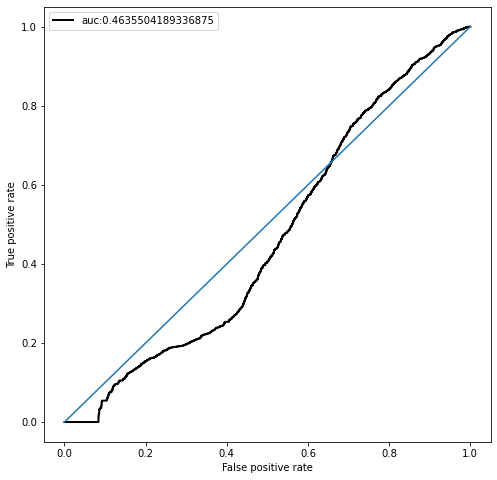

In [69]:
plt.figure(figsize=(8,8))
fpr,tpr,th = roc_curve(test_label, -pred_score)
plt.plot(fpr,tpr,'k-',lw=2 , label = "auc:"+str(auc) )
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

# Training with original data

In [ ]:
clf_org = IsolationForest()
clf_org.fit(train_data_org)

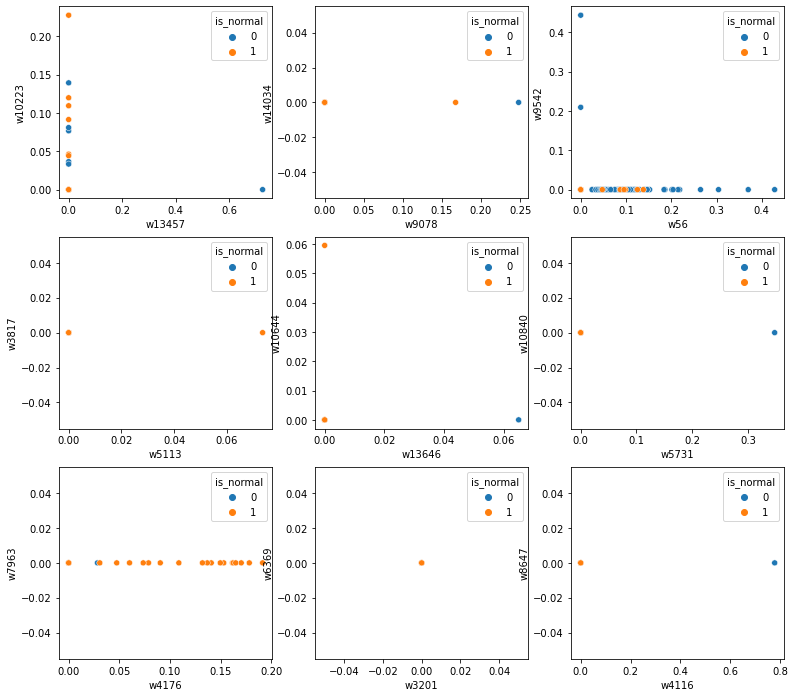

In [64]:
fig, ax = plt.subplots(3,3, figsize=(13,12))

for i in range(3):
    for j in range(3):
        a = random.randint(0,len(data.columns)-1)
        b = random.randint(0,len(data.columns)-1)
        sns.scatterplot(test_data[f"w{a}"] , test_data[f"w{b}"] , hue = test.is_normal ,ax=ax[j][i])
        

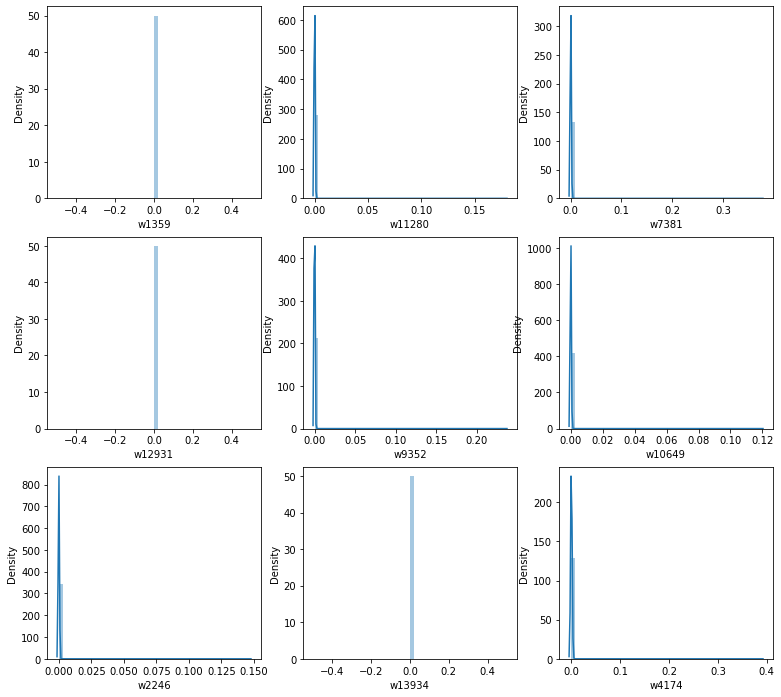

In [67]:
fig, ax = plt.subplots(3,3, figsize=(13,12))

for i in range(3):
    for j in range(3):
        a = random.randint(0,len(data.columns)-1)
        b = random.randint(0,len(data.columns)-1)
        sns.distplot(test_data[f"w{a}"]  ,ax=ax[j][i])
        
        

Text(0, 0.5, 'True positive rate')

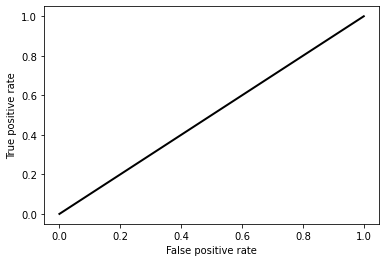

In [19]:
fpr,tpr,th = roc_curve(test_label, test_prediction)
plt.plot(fpr,tpr,'k-',lw=2)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [24]:
a=10